In [0]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
X=[]
Y1=[]
for i in range(100):
  X.append(i)
  Y1.append(math.cos(i))

In [0]:
Y2=[]
for i in range(100):
  Y2.append(i*4)

In [0]:

inp = np.column_stack((Y1, Y2))
tst = [Y1*Y2 for Y1,Y2 in zip(Y1,Y2)]

In [0]:
inp = np.array(inp, dtype="float32")
trgt = np.array(tst, dtype="float32")

In [24]:
inp= np.array(inp).reshape(100, 2,1)
inp.shape

(100, 2, 1)

In [25]:
trgt.shape

(100,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(inp,trgt,test_size=0.2,random_state=4)

In [27]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(2,1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 2, 200)            161600    
_________________________________________________________________
lstm_6 (LSTM)                (None, 2, 100)            120400    
_________________________________________________________________
lstm_7 (LSTM)                (None, 2, 50)             30200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [0]:
history = model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

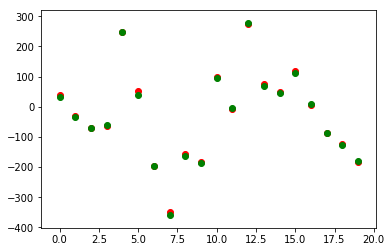

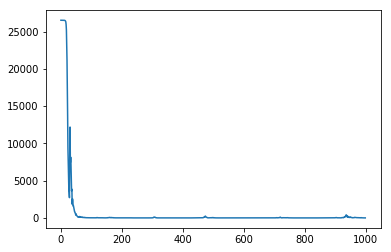

In [29]:
results = model.predict(x_test)
results.shape
y_test.shape
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()
plt.plot(history.history['loss'])
plt.show()